In [1]:
#-------------------------------
# Step 0. Setting up the imports
#-------------------------------
import numpy as np

# Import Qiskit packages
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum", instance="executive/internal/main")

# Define backend
use_real = True

if use_real:
    backend = service.backend('ibmq_kolkata')
else:
    backend = service.backend('ibmq_qasm_simulator')

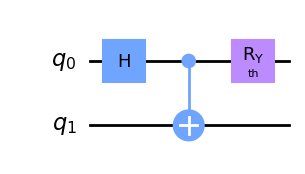

In [2]:
#---------------------------
# Step 1. circuit selection 
#---------------------------

from qiskit.circuit import Parameter
from CHSH_helpers import build_chsh_circuit

th = Parameter('th')
chsh_circuits = build_chsh_circuit(th)

chsh_circuits.draw('mpl')

In [3]:
#------------------------------
# Step 2. Problem specification
#------------------------------
from qiskit.quantum_info import SparsePauliOp

number_of_phases = 20
phases = np.linspace(0, 2*np.pi, number_of_phases)
chsh = SparsePauliOp.from_list([('ZZ', 1), ('ZX', -1), ('XZ', 1), ('XX', 1)])

In [4]:
#------------------------------------
# Step 3. Execute using the Estimator
#------------------------------------

options = Options()
options.resilience_level = 1
options.execution.shots = 1000

# Run the experiments

estimator = Estimator(session=backend, options=options)
    
job = estimator.run(circuits=[chsh_circuits]*number_of_phases, 
                    observables=[chsh]*number_of_phases, parameter_values=[[ph] for ph in phases])

from CHSH_helpers import check_job_status
values = check_job_status(job)

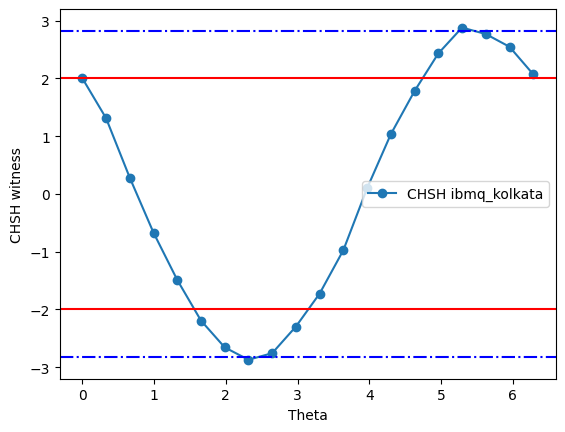

In [5]:
import matplotlib.pyplot as plt

plt.plot(phases, values, 'o-', label='CHSH %s'%(backend.name))

plt.axhline(y=2, color='r', linestyle='-')
plt.axhline(y=-2, color='r', linestyle='-')
plt.axhline(y=np.sqrt(2)*2, color='b', linestyle='-.')
plt.axhline(y=-np.sqrt(2)*2, color='b', linestyle='-.')
plt.ylim(-3.2,3.2)
plt.xlabel('Theta')
plt.ylabel('CHSH witness')
plt.legend(loc="center right")
plt.show()